<a href="https://colab.research.google.com/github/aparnaashok2125/Elevate-Labs-AI-ML-Internship/blob/main/Elevate_Labs_Task_6_K_Nearest_Neighbors_(KNN)_Classification_Iris_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

K-Nearest Neighbors (KNN) Classification - Iris Dataset

📌 Objective
Implement and understand the K-Nearest Neighbors (KNN) algorithm for classification using the Iris dataset.

🛠 Tools and Libraries Used
Python
Pandas
NumPy
Matplotlib
Scikit-learn

📁 Dataset
The dataset used is the Iris flower dataset from Kaggle. It contains 150 samples of iris flowers categorized into three species: Setosa, Versicolor, and Virginica.

🔍 Steps Performed
Data Loading: Loaded Iris.csv and removed unnecessary columns like Id.
Label Encoding: Converted categorical species labels to numerical format using LabelEncoder.
Feature Scaling: Standardized the feature values using StandardScaler.
Train-Test Split: Split the data into training and test sets (80/20).
Model Building: Used KNeighborsClassifier from scikit-learn to train models with different values of K.
Evaluation: Calculated accuracy and plotted confusion matrices for each value of K.
Visualization: Plotted decision boundaries using two selected features to visually understand how the KNN algorithm classifies data points.

📊 Results
Tested the model with K values: 1, 3, 5, and 7.
Best performance observed around K=3 with high accuracy.
Confusion matrices clearly indicate the model’s classification effectiveness.

📌 Conclusion
KNN is a simple yet effective classification algorithm when applied to normalized data. It performs well on the Iris dataset and provides intuitive decision boundaries when visualized in 2D.

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Load dataset

In [2]:
df = pd.read_csv("Iris.csv")

In [3]:
if 'Id' in df.columns:
    df = df.drop(columns=['Id'])

# Encoding categorical data

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

In [5]:
X = df.drop(columns=['Species'])
y = df['Species']

# Feature Scaling

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test-Split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# KNN Classifier

In [8]:
k_values = [1, 3, 5, 7]
for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"K={k}, Accuracy={acc:.2f}")

K=1, Accuracy=0.97
K=3, Accuracy=1.00
K=5, Accuracy=1.00
K=7, Accuracy=1.00


# Confusion matrix

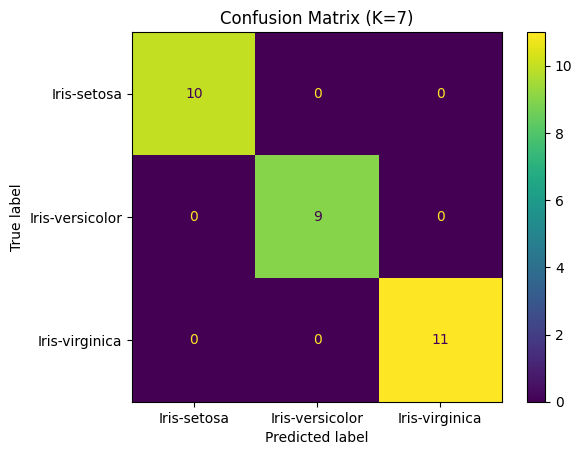

In [9]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=le.classes_).plot()
plt.title(f"Confusion Matrix (K={k})")
plt.show()

# Visualizing Decision Boundaries

In [10]:
X_vis = X_scaled[:, [0, 2]]  # Using SepalLength and PetalLength
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y, test_size=0.2, random_state=42)
model_vis = KNeighborsClassifier(n_neighbors=3)
model_vis.fit(X_train_vis, y_train_vis)

KNeighborsClassifier(n_neighbors=3)

In [11]:
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = model_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

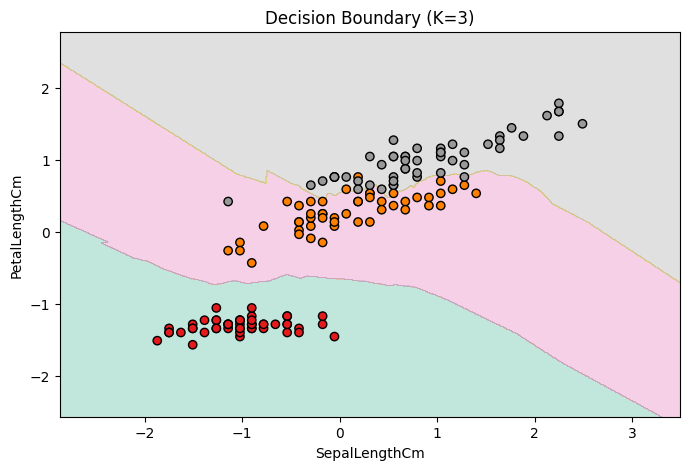

In [12]:
plt.figure(figsize=(8, 5))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.Set2)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y, edgecolor='k', cmap=plt.cm.Set1)
plt.xlabel("SepalLengthCm")
plt.ylabel("PetalLengthCm")
plt.title("Decision Boundary (K=3)")
plt.show()